# The Water-gas shift reaction

The [water–gas shift reaction](https://en.wikipedia.org/wiki/Water%E2%80%93gas_shift_reaction) is a gas-phase reaction, widely used in industry, between carbon monoxide and water to form carbon dioxide and hydrogen:

$$
\mathrm{CO(g)} + \mathrm{H_2O(g)} \rightleftharpoons \mathrm{CO_2(g)} + \mathrm{H_2(g)}
$$

This equilibrium can be analysed in terms of the Gibbs free energy of its constituents as a function of composition and temperature:

$$
nG_\mathrm{m} = \sum_\mathrm{J} n_\mathrm{J} \left[ RT \Delta_\mathrm{f}G_\mathrm{m, J}^\ominus(T) + RT\ln \left( x_\mathrm{J} \frac{p}{p^\ominus} \right) \right],
$$

where $n_\mathrm{J}$ is the amount of component $\mathrm{J}$, $\Delta_\mathrm{f}G_\mathrm{m, J}^\ominus(T)$ is the standard molar Gibbs free energy of formation of $\mathrm{J}$ at temperature $T$, $x_\mathrm{J} = n_\mathrm{J} / n$ is the mole fraction of $\mathrm{J}$ and $p$ is the total pressure. At the equilibrium composition $nG_\mathrm{m}$ is a minimum.

The formation reactions are:

\begin{align*}
\textstyle \mathrm{C(gr)} + \frac{1}{2}\mathrm{O_2(g)} &\rightarrow \mathrm{CO(g)}\\
\textstyle \mathrm{H_2(g)} + \frac{1}{2}\mathrm{O_2(g)} &\rightarrow \mathrm{H_2O(g)}\\
\mathrm{C(gr)} + \mathrm{O_2(g)} &\rightarrow \mathrm{CO_2(g)}\\
\end{align*}

so $\Delta_\mathrm{f}G_\mathrm{m, J}^\ominus(T_\mathrm{ref})$ can be calculated for the species $\mathrm{J} = \mathrm{CO(g)}, \mathrm{H_2O(g)}, \mathrm{CO_2(g)}, \mathrm{H_2(g)}$ from tabulated thermodynamic data at the reference temperature $T_\mathrm{ref}=298\;\mathrm{K}$ as $\Delta_\mathrm{f}G_\mathrm{m,J}^\ominus(T_\mathrm{ref}) = \Delta_\mathrm{f}H_\mathrm{m,J}^\ominus(T_\mathrm{ref}) - T_\mathrm{ref}\Delta_\mathrm{f}S_\mathrm{m,J}^\ominus(T_\mathrm{ref})$.

$\Delta_\mathrm{f}G_\mathrm{m,J}^\ominus(T)$ depends on temperature through the [Gibbs-Helmholtz equation](https://en.wikipedia.org/wiki/Gibbs%E2%80%93Helmholtz_equation):

$$
\frac{\mathrm{d}\Delta_\mathrm{f}G_\mathrm{m,J}^\ominus(T) / T}{\mathrm{d}T} = -\frac{\Delta_\mathrm{f}H_\mathrm{m, J}^\ominus(\mathrm{T})}{T^2}.
$$

This last equation can be integrated with respect to temperature, with the temperature-dependence of the enthalpy of formation obeying:

$$
\Delta_\mathrm{f}H_\mathrm{m, J}^\ominus(\mathrm{T}) = \Delta_\mathrm{f}H_\mathrm{m, J}^\ominus(\mathrm{T_\mathrm{ref}}) + \int_{T_\mathrm{ref}}^{T} \Delta_\mathrm{f}C_{p, \mathrm{m, J}}^\ominus(T) \,\mathrm{d}T,
$$

where $\Delta_\mathrm{f}C_{p, \mathrm{m, J}}^\ominus(T)$ is the difference in heat capacity between species $\mathrm{J}$ and its component atoms in their standard state, e.g. $\Delta_\mathrm{f}C_{p, \mathrm{m, CO}}^\ominus(T) = C_{p, \mathrm{m, CO}}^\ominus(T) - C_{p, \mathrm{m, C}}^\ominus(T) - \frac{1}{2}C_{p, \mathrm{m, O_2}}^\ominus(T)$. The temperature dependence of the heat capacities of individual species is provided by a fit to the the data in the [NIST-JANAF Thermochemical Tables](https://janaf.nist.gov/): 

$$
C_{p, \mathrm{m}}^\ominus(T) = A + Bt + Ct^2 + Dt^3, \quad \mathrm{where} \; t = \frac{T/\mathrm{K}}{1000}.
$$

With this in place (and after some calculus), the Gibbs free energy for any composition can be calculated as a function of temperature. The plots of $nG_\mathrm{m}/RT$ with composition for four different temperatures are shown below; the equilibrium concentration in each case at is the minimum of these curves.

In [1]:
import numpy as np
from scipy.constants import R
import matplotlib.pyplot as plt
Tref = 298.15    # Reference temperature, K
pstd = 1         # Standard pressure, bar

In [2]:
class Compound:
    """
    A class representing a chemical compound with defined
    formula and phase.
    """
    
    def __init__(self, formula, phase, DfHmo, Smo, Cp_coeffs):
        """
        Initialize the Compound object with its formula,
        phase, standard molar formation enthalpy (kJ.mol-1), standard
        entropy (J.K-1.mol-1) and heat capacity temperature-dependence
        coefficients.   
        """
        self.formula, self.phase = formula, phase
        self.DfHmo, self.Smo = DfHmo, Smo
        self.Cp_coeffs = dict(zip("ABCD", Cp_coeffs))

    def __repr__(self):
        """String representation of the Compound."""
        return f"{self.formula}({self.phase})"

C = Compound('C', 'gr', 0, 5.6, [8.43, 0, 0, 0])
O2 = Compound('O2', 'g', 0, 205.15, [25.15899701, 15.45182265, -7.08291124, 1.24519819])
H2 = Compound('H2', 'g', 0, 130.68, [29.35864238, -2.30374938, 4.0864225, -0.84549361])
H2O = Compound('H2O', 'g', -241.826, 188.835, [31.65695517, 3.84459406, 8.47064074, -2.77385035])
CO = Compound('CO', 'g', -110.53, 197.66, [27.48525388, 4.25879701, 2.50107857, -1.24204472])
CO2 = Compound('CO2', 'g', -393.52, 213.79, [23.04911248, 56.90377511, -31.87688451, 6.4056037])

In [3]:
class Reaction:
    """
    A class representing a chemical reaction between
    reactant and product Compounds.
    """

    def __init__(self, reactants, products):
        """
        Initalize the Reaction object with reactants and
        products provided as dictionaries of
        Compound: stoichiometry key-value pairs.
        """
        
        self.reactants = reactants
        self.products = products
        # For convenience, create a dictionary of all
        # species with positive stoichiometries for products
        # and negative stoichiometries for reactants.
        self.species = self.products.copy()
        for compound, stoich in reactants.items():
            self.species[compound] = -stoich

    def calc_DrSmo_ref(self):
        """Return the standard molar entropy of reaction in J.K-1.mol-1."""
        DrSmo = 0
        for compound, stoich in self.species.items():
            DrSmo += stoich * compound.Smo
        return DrSmo

    def calc_DrHmo_ref(self):
        """Return the standard molar enthalpy of reaction in kJ.mol-1."""
        DrHmo = 0
        for compound, stoich in self.species.items():
            DrHmo += stoich * compound.DfHmo
        return DrHmo

    def calc_DrGmo_ref(self):
        """
        Return the standard molar Gibbs free energy in kJ.mol-1 of
        reaction at the reference temperature, Tref.
        """
        return self.calc_DrHmo_ref() - Tref * self.calc_DrSmo_ref() / 1000

In [4]:
# The formation reactants for CO2(g), CO(g), and H2O(g).
CO2_formation = Reaction({C: 1, O2: 1}, {CO2: 1})
CO_formation = Reaction({C: 1, O2: 0.5}, {CO: 1})
H2O_formation = Reaction({H2: 1, O2: 0.5}, {H2O: 1})
formation_reactions = {"CO2(g)": CO2_formation, "CO(g)": CO_formation, "H2O(g)": H2O_formation}

In [5]:
# Calculate the standard enthalpies and free energies of 
# reaction at temperature Tref. NB these are zero by
# definition for H2(g).
DfHmo_ref = {
    "CO(g)": CO_formation.calc_DrHmo_ref(),
    "CO2(g)": CO2_formation.calc_DrHmo_ref(),
    "H2O(g)": H2O_formation.calc_DrHmo_ref(),
    "H2(g)": 0
}
DfGmo_ref = {
    "CO(g)": CO_formation.calc_DrGmo_ref(),
    "CO2(g)": CO2_formation.calc_DrGmo_ref(),
    "H2O(g)": H2O_formation.calc_DrGmo_ref(),
    "H2(g)": 0
}

In [6]:
def get_DfCp_coeffs(T):
    """
    Return the coefficients, valid at temperature T, for the heat capacity
    change for the formation reactions of CO(g), CO2(g) and H2O(g) in a
    dictionary of species: {"CO(g)": {'A': ..., 'B': ...}, ...}.
    """

    # Initialize coefficients to zero.
    DfCp = dict((formula, dict((c, 0) for c in "ABCD"))
                    for formula in ("CO(g)", "CO2(g)", "H2O(g)", "H2(g)"))
    for formation_species in ("CO(g)", "CO2(g)", "H2O(g)"):
        formation_reaction = formation_reactions[formation_species]
        for compound, stoich in formation_reaction.species.items():
            for c in "ABCD":
                DfCp[formation_species][c] += stoich * compound.Cp_coeffs[c]
    return DfCp

In [11]:
def g(T, formation_species, DfCp):
    """
    This term in the expression for nG/RT derives from integrating
    (twice) the heat capacity change on formation of the component
    species with respect to temperature.
    """
    DA, DB, DC, DD = (DfCp[formation_species][c] for c in "ABCD")
    t, tref = T/1000, Tref/1000
    f = 1/t - 1/tref
    return (DA * (np.log(t / tref) + tref * f)
            + DB/2 * (t - tref + tref**2 * f)
            + DC/3 * ((t**2 - tref**2) / 2 + tref**3 * f)
            + DD/4 * ((t**3 - tref**3) / 3 + tref**4 * f)
           ) / 1000

def calc_DfGmo(T, formation_species, DfCp):
    """
    Return the standard Gibbs free energy of formation of formation_species
    at temperature T from the integrated Gibbs-Helmholtz equation.
    """
    DfGmo_over_T = (DfGmo_ref[formation_species] / Tref
                    + DfHmo_ref[formation_species] * (1/T - 1/Tref)
                    - g(T, formation_species, DfCp)
                   )
    return DfGmo_over_T * T

In [12]:
# Start with 1 mol of CO(g) and 1 mol of H2O(g) reactants only.
nin = {"CO(g)": 1, "H2O(g)": 1, "CO2(g)": 0, "H2(g)": 0}

def calc_nG_over_RT(xi, T, DfCp):
    """
    Return the quantity nG/RT for temperature T and extent of
    reaction, xi: xi is the amount of CO(g) reacted.
    """
    nout = {"CO(g)": nin["CO(g)"] - xi,
            "H2O(g)": nin["H2O(g)"] - xi,
            "CO2(g)": nin["CO2(g)"] + xi,
            "H2(g)": nin["H2(g)"] + xi}
    ntot = sum(nout.values())
    nG_over_RT = 0
    for species in ("CO(g)", "H2O(g)", "CO2(g)", "H2(g)"):
        DfGmo = calc_DfGmo(T, species, DfCp)
        x = nout[species] / ntot
        nG_over_RT += nout[species] * (DfGmo / R / T * 1000 + np.log(x * pstd))
    return nG_over_RT

In [13]:
def plot_nG_over_RT(T, ax):
    """Plot nG/RT vs. xi on Matplotlib Axes ax."""
    DfCp = get_DfCp_coeffs(T)
    xi_grid = np.arange(0.01, 1, 0.01)
    nG_over_RT = np.zeros(xi_grid.shape) 
    for i, xi in enumerate(xi_grid):
        nG_over_RT[i] = calc_nG_over_RT(xi, T, DfCp)
    ax.plot(xi_grid, nG_over_RT)
    ax.set_xlabel("xi /mol")
    ax.set_ylabel("nG/RT")
    ax.text(0.5, 0.7, f"{T} K", transform=ax.transAxes, ha="center", va="center")

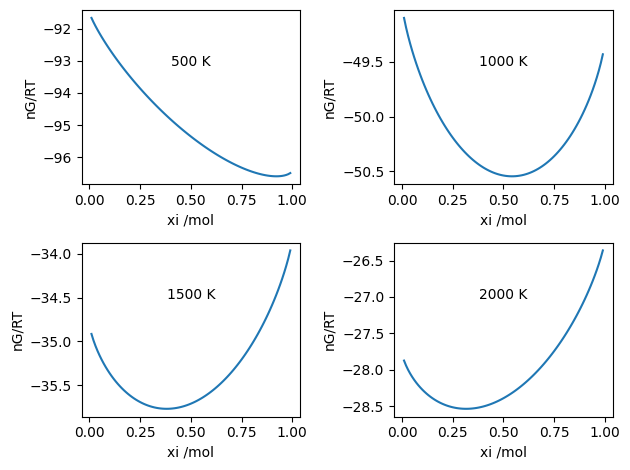

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plot_nG_over_RT(500, axes[0][0])
plot_nG_over_RT(1000, axes[0][1])
plot_nG_over_RT(1500, axes[1][0])
plot_nG_over_RT(2000, axes[1][1])
plt.tight_layout()

The equilibrium position of the composition occurs at the minimum of $nG_\mathrm{m}$, which can be found numerically using `scipy.optimize.minimize`, constraining the reaction extent (number of moles of CO reacted) to be between 0 and 1 mol, since there is 1 mol initially.

In [16]:
from scipy.optimize import minimize
def get_K(T):
    DfCp = get_DfCp_coeffs(T)
    cons = ({'type': 'ineq', 'fun': lambda X: X[0]},     # xi > 0
            {'type': 'ineq', 'fun': lambda X: 1-X[0]})   # xi < 1
    res = minimize(calc_nG_over_RT, (0.1,), args=(T, DfCp), method="slsqp",
                   constraints=cons)
    x = res.x[0]
    K = x**2 / (1-x)**2
    return K

In [17]:
K = []
for T in (500, 1000, 1500, 2000):
    K.append(get_K(T))
K

/var/folders/gv/kskd42kn4b38bq55919b71y40000gn/T/ipykernel_43140/770963320.py:18: RuntimeWarning: invalid value encountered in log
  nG_over_RT += nout[species] * (DfGmo / R / T * 1000 + np.log(x * pstd))
/var/folders/gv/kskd42kn4b38bq55919b71y40000gn/T/ipykernel_43140/770963320.py:18: RuntimeWarning: divide by zero encountered in log
  nG_over_RT += nout[species] * (DfGmo / R / T * 1000 + np.log(x * pstd))
/var/folders/gv/kskd42kn4b38bq55919b71y40000gn/T/ipykernel_43140/770963320.py:18: RuntimeWarning: invalid value encountered in multiply
  nG_over_RT += nout[species] * (DfGmo / R / T * 1000 + np.log(x * pstd))


[137.03092238027537,
 1.4040566158667849,
 0.37749729566513246,
 0.2128298922078678]

The comparison with the following fitted function given by Catilin Callaghan in her [2006 PhD thesis](https://digital.wpi.edu/concern/etds/000000107?locale=en) is pretty good:

$$
\log_{10} K = -2.4198 + 0.0003856T + \frac{2180.6}{T}.
$$

In [18]:
def Keq(T):
    return 10**(-2.4198 + 0.0003856*T + 2180.6/T)
for T in (500, 1000, 1500, 2000):
    print(Keq(T))

136.20717952990907
1.4008769839545847
0.40957489947329023
0.276503096983568
